In [158]:
import numpy as np 
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
%matplotlib inline

from nanograd.nn import MLP, Layer, Neuron

In [103]:
# Number of training examples 
n = 250

# Simulate data from a Multivariate Normal
# Two balanced classes
class_0 = np.random.multivariate_normal(
    np.array([2, 2]), np.array([[0.2, 0], [0, 0.2]]), size=int(0.5 * n)
)


class_1 = np.random.multivariate_normal(
    np.array([-1, 2]), np.array([[1, 0], [0, 1]]), size=int(0.5 * n)
)


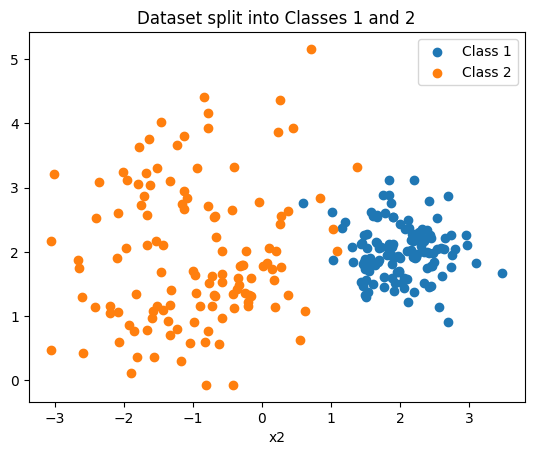

In [104]:
plt.scatter(class_0[:, 0], class_0[:, 1], label  = "Class 1")
plt.scatter(class_1[:, 0], class_1[:, 1], label = "Class 2")
plt.title("Dataset split into Classes 1 and 2")
plt.xlabel('x1')
plt.xlabel('x2')
plt.legend()
plt.show()


In [105]:
x = np.concatenate([class_0, class_1], axis=0)
y = np.concatenate([np.zeros(int(0.5 * n)), np.ones(int(0.5 * n))])
idx_shuffle = np.random.choice(np.arange(x.shape[0]), size=x.shape[0], replace=False)

In [106]:
train_split = int(0.8 * n)
dev_split = int(0.1 * n) + train_split
test_split = int(0.1 * n) + dev_split

train_idx = idx_shuffle[:train_split]
dev_idx = idx_shuffle[train_split:dev_split]
test_idx = idx_shuffle[dev_split:]


In [107]:
x_train, y_train = x[train_idx, :], y[train_idx]
x_dev, y_dev = x[dev_idx, :], y[dev_idx]
x_test, y_test = x[test_idx, :], y[test_idx]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


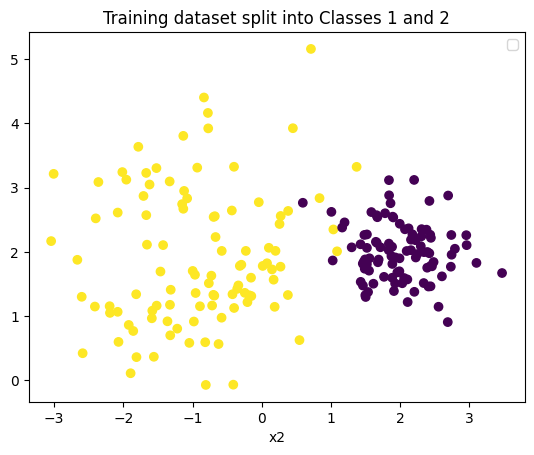

In [108]:
# plot the training set, dev set and test sets 
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.title("Training dataset split into Classes 1 and 2")
plt.xlabel('x1')
plt.xlabel('x2')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


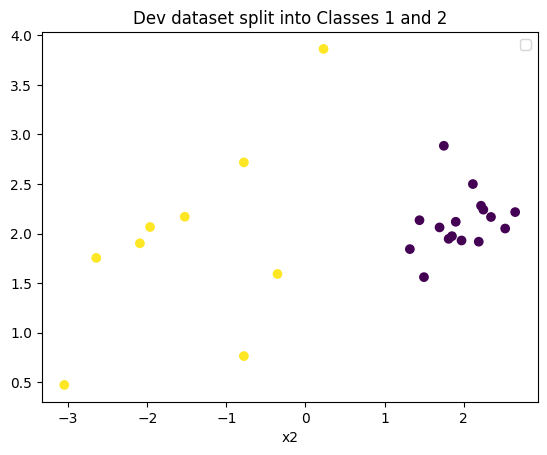

In [109]:
# plot the training set, dev set and test sets 
plt.scatter(x_dev[:, 0], x_dev[:, 1], c=y_dev)
plt.title("Dev dataset split into Classes 1 and 2")
plt.xlabel('x1')
plt.xlabel('x2')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


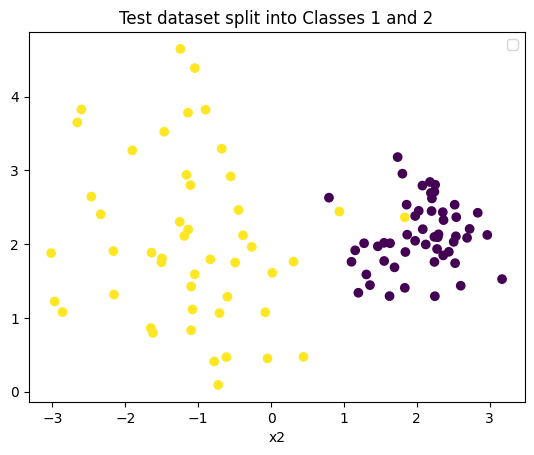

In [47]:
# plot the training set, dev set and test sets
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
plt.title("Test dataset split into Classes 1 and 2")
plt.xlabel("x1")
plt.xlabel("x2")
plt.legend()
plt.show()


In [117]:
# Create the MLP
net = MLP(
    [
        Layer(2, 10, activation="sigmoid"),
        Layer(10, 1, activation="sigmoid"),
    ]
)


In [118]:
# Training loss
xs = []
ys = []

# Dev loss
xs_dev = []
ys_dev = []

# Test Loss
xs_test = []
ys_test = []


# parameters
batch_size = 8
epochs = 10 
learning_rate = 0.1


def get_batches(x, y, batch_size):
    """Data Loader"""
    # Randomly shuffles the indices
    idx = np.random.choice(np.arange(x.shape[0]), size=x.shape[0], replace=False)
    xb = x[idx]
    y = y[idx]
    for start, stop in zip(
        np.arange(0, x.shape[0], batch_size),
        np.arange(batch_size, x.shape[0], batch_size),
    ):
        yield xb[start:stop, :], y[start:stop]


def report_accuracy(n, x, y):
    """
    Get the accuracy on each of the training and test set
    As the classes are mostly balanced this is a good enough measure
    """
    return sum(round(n(x[i, :]).data) == y[i] for i in range(x.shape[0])) / x.shape[0]


In [119]:
# Implement the training loop
for j in range(epochs):

    for x, y in get_batches(x_train, y_train, batch_size):
        net.zero_grad()
        loss = (
            sum((net(x_train[i, :]) - y_train[i]) ** 2 for i in range(x_train.shape[0]))
            / x_train.shape[0]
        )
        loss.backward()

        xs.append(j)
        ys.append(loss.item())

        for p in net.parameters():
            p.data += -learning_rate * p.grad

    if j % 5 == 0:
        print(f"Epoch --- {j}")
        loss_dev = (
            sum((net(x_dev[i, :]) - y_dev[i]) ** 2 for i in range(x_dev.shape[0]))
            / x_dev.shape[0]
        )
        xs_dev.append(j)
        ys_dev.append(loss_dev.item())

        loss_test = (
            sum((net(x_test[i, :]) - y_test[i]) ** 2 for i in range(x_test.shape[0]))
            / x_test.shape[0]
        )

        xs_test.append(j)
        ys_test.append(loss_test.item())

        print(f"Training Accuracy = {report_accuracy(net, x_train, y_train)}")
        print(f"Dev      Accuracy = {report_accuracy(net, x_dev, y_dev)}")
        print(f"Test     Accuracy = {report_accuracy(net, x_test, y_test)}")


Epoch --- 0
Epoch --- 5


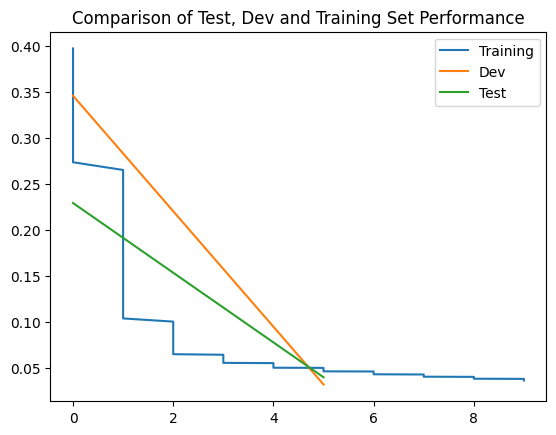

In [120]:
plt.plot(xs, ys, label="Training")
plt.plot(xs_dev,  ys_dev, label="Dev")
plt.plot(xs_test, ys_test, label="Test")
plt.legend()
plt.title("Comparison of Test, Dev and Training Set Performance")
plt.show()


In [121]:
# Reports classification accuracy of around 0.97 ish 
print(f"Training Accuracy = {report_accuracy(net, x_train, y_train)}")
print(f"Dev Accuracy = {report_accuracy(net, x_dev, y_dev)}")
print(f"Test Accuracy = {report_accuracy(net, x_test, y_test)}")


Training Accuracy = 0.97
Dev Accuracy = 1.0
Test Accuracy = 0.96


In [145]:
# Have a look at the decision boundary learnt by the network 
# Using a grid search 
num_steps = 40 
decision_boundary = [] 
x1s = []
x2s = []
for i, x1 in enumerate(np.linspace(-4, 4, num = num_steps)):
    for j, x2 in enumerate(np.linspace(0, 5, num = num_steps)):
        x1s.append(x1)
        x2s.append(x2)
        decision_boundary.append(round(net([x1, x2]).data))


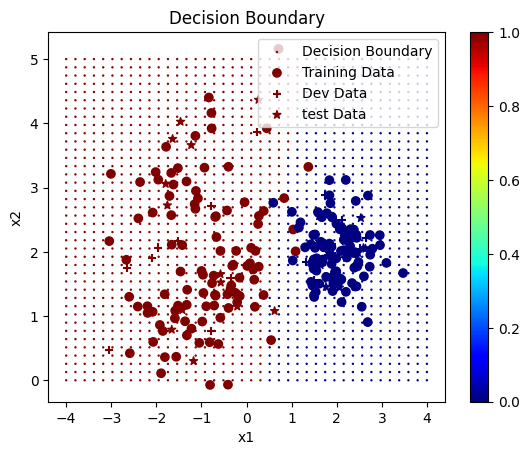

In [166]:
plt.scatter(
    x=x1s, y=x2s, c=decision_boundary, s=0.5, cmap='jet', label="Decision Boundary",
)

plt.scatter(
    x=x_train[:, 0], y=x_train[:, 1], c=y_train, cmap="jet", label="Training Data", marker="o"
)

plt.scatter(
    x=x_dev[:, 0], y=x_dev[:, 1], c=y_dev, cmap="jet", label="Dev Data", marker="+"
)


plt.scatter(
    x=x_test[:, 0], y=x_test[:, 1], c=y_test, cmap="jet", label="test Data", marker="*"
)



plt.title("Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.colorbar()
plt.show()
